In [1]:
import pickle 
import sys
sys.path.insert(0, '/zhome/a6/6/127219/Speciale/master_project')
from src.visualization.tsne_visual import visualize_layerwise_embeddings#, visualize_one_layer


In [2]:
with open('/work3/s174498/roberta_files/data_set_woman_random_1_2.pickle', 'rb') as file:
    ds_ = pickle.load(file)

In [22]:
with open('/work3/s174498/roberta_files/output_roberta_base.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [13]:
with open('/work3/s174498/roberta_files/final_output_roberta_head_nn.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [25]:
with open('/work3/s174498/roberta_files/final_output_roberta_head_linear.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [2]:
with open('/work3/s174498/roberta_files/output_roberta_linear_woman_random_1_2.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [38]:
with open('/work3/s174498/roberta_files/output_roberta_linear_tweet_random_1_2.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [34]:
with open('/work3/s174498/roberta_files/output_roberta_linear_tweet_off_random_1_2.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [27]:
with open('/work3/s174498/roberta_files/output_roberta_linear_tweet_iro_random_1_2.pickle', 'rb') as handle:
    output_linear = pickle.load(handle)

In [37]:
output_linear.predictions[1][0].shape

(1821, 57, 768)

In [42]:
(output_linear.label_ids == 1).sum()/2

159.0

In [26]:
# fine tune linear 
#labels = [0]* 162+ [1]* 168+ [2]*183 # output_linear.label_ids
#labels = [0]* 151+ [1]* 146+ [2]*141
#labels = [0]* 294+ [1]* 294 + [2]*295 # output_linear.label_ids
#labels = [0]* 162+ [1]* 159+ [2]*159
labels = output_linear.label_ids 
hidden_states =  output_linear.predictions[1][1:]
title = 'linear_results'
layers_to_visualize = [10,11] # [0,1,2,3,4,5,6,7,8,9,
init = 'pca'
labels_text = ['negative','positive']# ['hate','random 1','random 2']
perplexity = 10

mean = False 
save = True

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


>>> hidden shape: (1821, 768)


/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


>>> hidden shape: (1821, 768)


/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


>>> save fig. <<<


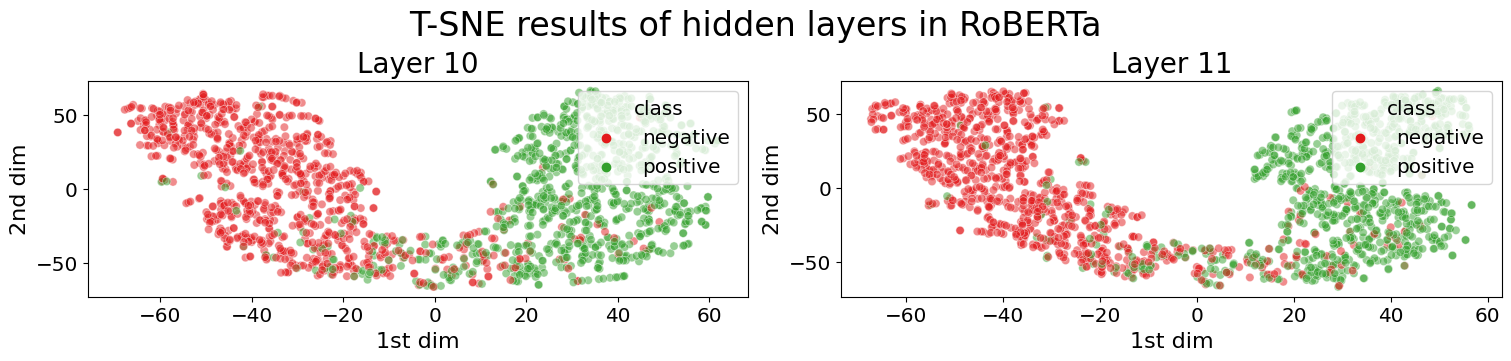

In [28]:
dim_reducer = TSNE(n_components=2, init = init, perplexity = perplexity)

num_layers = len(layers_to_visualize)
n = len(np.array(labels).reshape(-1))
label_text = np.array(['nan']*n)
label_text = np.where(np.array(labels).reshape(-1) != 0, label_text, labels_text [0])
label_text = np.where(np.array(labels).reshape(-1) != 1, label_text, labels_text [1])
#label_text = np.where(np.array(labels).reshape(-1) != 2, label_text, labels_text [2])

col_size = int(num_layers/2)
fig = plt.figure(figsize=(15,col_size*3.5), constrained_layout=True) #each subplot of size 6x6, each row will hold 4 plots
fig.suptitle(f'T-SNE results of hidden layers in RoBERTa', fontsize =24)
ax = [fig.add_subplot(col_size,2,i+1) for i in range(num_layers)]

palette ={0:sns.color_palette("Paired")[0], 1:sns.color_palette("Paired")[6],
            'neg':sns.color_palette("Paired")[1], 'pos':sns.color_palette("Paired")[7],
            'negative':sns.color_palette("Paired")[5], 'positive':sns.color_palette("Paired")[3],
            'random 1':'grey',#sns.color_palette("Paired")[1],
            'random 2':sns.color_palette("Paired")[5],
             'woman':sns.color_palette("Paired")[7],
             'hate':sns.color_palette("Paired")[9], 'offensive':sns.color_palette("Paired")[5], 'irony':sns.color_palette("Paired")[5]}
edge_colors = [sns.color_palette("Paired")[1],sns.color_palette("Paired")[8],sns.color_palette("Paired")[4]]

labels = np.array(labels).reshape(-1)

for i,layer_i in enumerate(layers_to_visualize):
    layer_embeds = hidden_states[layer_i]
    
    if mean:
        layer_averaged_hidden_states = layer_embeds.mean(axis=1)
    else:
        layer_averaged_hidden_states = layer_embeds[:,0,:]
    
    print('>>> hidden shape:',layer_averaged_hidden_states.shape)
    layer_dim_reduced_embeds = dim_reducer.fit_transform(layer_averaged_hidden_states);
    
    df = pd.DataFrame.from_dict({'first dim':layer_dim_reduced_embeds[:,0],'second dim':layer_dim_reduced_embeds[:,1],'label':labels, 'label_text': label_text})
    
    scatter = sns.scatterplot(data=df,x='first dim',y='second dim',hue='label_text',ax=ax[i], palette = palette, alpha = 0.5 , edgecolors =edge_colors )
    scatter.legend(loc = 'upper right',fontsize = 'x-large', title = 'class',title_fontsize='x-large');

    scatter.axes.set_title( f'Layer {layer_i}',fontsize=20);
    scatter.set_xlabel('1st dim',fontsize=16);
    scatter.set_ylabel('2nd dim',fontsize=16);
    scatter.tick_params(labelsize='x-large');

if save: 
    print('>>> save fig. <<<')   
    plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/hidden_layers_10_11_linear_model.pdf',format='pdf',pad_inches=0)#(f'/work3/s174498/roberta_files/hidden_layers_{title}_{perplexity}_{init}',format='png',pad_inches=0)


In [23]:
title = 'base' # 'nn
layer_name = 'Layer 11' #'Dense-layer'
mean = False
hidden_state = output_linear.predictions[1][12] #output_linear.predictions[2]
labels = output_linear.label_ids 
save = True
init = 'pca'
labels_text = ['negative','positive']# ['hate','random 1','random 2']
perplexity = 10

>>> hidden shape: (1821, 768)


/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


>>> t-SNE output dim: (1821, 2)
>>> save fig. <<<


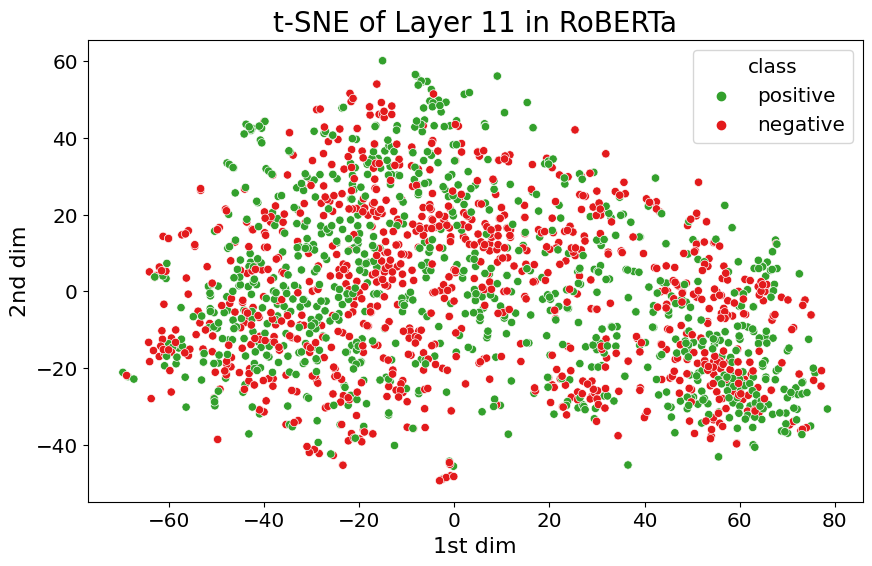

In [24]:

dim_reducer = TSNE(n_components=2, init = init, perplexity = perplexity)

n = len(np.array(labels).reshape(-1))
label_text = np.array(['nan']*n)
label_text = np.where(np.array(labels).reshape(-1) == 0, label_text, 'negative')
label_text = np.where(np.array(labels).reshape(-1) == 1, label_text, 'positive')


plt.figure(figsize=(10,6)) # 
plt.title(f't-SNE of {layer_name} in RoBERTa', fontsize =20)

labels = np.array(labels).reshape(-1)
if hidden_state.ndim < 3:
    layer_averaged_hidden_states = hidden_state
else:
    if mean:
        layer_averaged_hidden_states = hidden_state.mean(axis=1)
    else:
        layer_averaged_hidden_states = hidden_state[:,0,:]
print('>>> hidden shape:',layer_averaged_hidden_states.shape)
layer_dim_reduced_embeds = dim_reducer.fit_transform(layer_averaged_hidden_states);
print('>>> t-SNE output dim:',layer_dim_reduced_embeds.shape)
df = pd.DataFrame.from_dict({'first dim':layer_dim_reduced_embeds[:,0],'second dim':layer_dim_reduced_embeds[:,1],'label':labels, 'label_text': label_text})

#df = pd.DataFrame.from_dict({'x':layer_dim_reduced_embeds[:,0],'y':layer_dim_reduced_embeds[:,1],'label':labels})
palette ={0:sns.color_palette("Paired")[0], 1:sns.color_palette("Paired")[6],
    'negative':sns.color_palette("Paired")[5], 'positive':sns.color_palette("Paired")[3],
            'neg':sns.color_palette("Paired")[1], 'pos':sns.color_palette("Paired")[7]}
scatter = sns.scatterplot(data=df,x='first dim',y='second dim',hue='label_text', palette = palette );
scatter.legend(loc = 'upper right',fontsize = 'x-large', title = 'class',title_fontsize='x-large');
scatter.set_xlabel('1st dim',fontsize=16);
scatter.set_ylabel('2nd dim',fontsize=16);
scatter.tick_params(labelsize='x-large');

if save:  
    print('>>> save fig. <<<')  
    plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/{layer_name}_{title}_{perplexity}_{init}.pdf',format='pdf',pad_inches=0)

In [33]:
save = True
if save: 
    print('>>> save fig. <<<')   
    plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/hidden_layers_linear_hate_random_1_2.pdf',format='pdf',pad_inches=0)#(f'/work3/s174498/roberta_files/hidden_layers_{title}_{perplexity}_{init}',format='png',pad_inches=0)


>>> save fig. <<<


<Figure size 640x480 with 0 Axes>